# N26 Stratascratch Project

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/n_26/
!ls


Mounted at /content/drive
/content/drive/MyDrive/n_26
mcc_group_definition.csv  transactions_data_training.csv  transaction_types.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics


In [3]:
#load data set

mcc = pd.read_csv('mcc_group_definition.csv')
transaction = pd.read_csv('transaction_types.csv')
data = pd.read_csv('transactions_data_training.csv')

In [ ]:
mcc

mcc_group                 explanation
0           1                         ATM
1           2                   Groceries
2           3                 Gastronomie
3           4          Shopping/(Fashion)
4           5  Home and DIY, House Energy
5           6                Travel/Hotel
6           7                   Transport
7           8              Automotive/Gas
8           9      Family/Babies/Children
9          10       Entertainment/Leisure
10         11                   Drugstore
11         12                     Finance
12         13                   Insurance
13         14             Taxes and Fines
14         15                   Education
15         16               Miscellaneous
16         17           Business Expenses

In [ ]:
transaction

type                        explanation direction         agent
0    AR               Authorization reject         -          Card
1    AE              Authorization expired        In          Card
2    AV             Authorization Reversal        In          Card
3   BBU                     Cash26 deposit        In       Partner
4    CT                    Credit Transfer        In  Bank Account
5    DI                            Dispute        In          Card
6    DR                     Debit Reversal        In  Bank Account
7    PF     Credit Card refund by merchant        In          Card
8    PR               Presentment Reversal        In          Card
9    WU                   Referral payment        In      Number26
10   AA                  Authorized Action       Out          Card
11  BUB                  Cash26 withdrawal       Out       Partner
12   DD                       Direct Debit       Out  Bank Account
13   DT                     Debit Transfer       Out  Bank Account
14   FT                 MoneyBeam Transfer       Out  Bank Account
15   PT                        Presentment       Out          Card
16  TUB           Transferwise Transaction       Out       Partner
17  TBU  Transferwise Transaction Reversal        In       Partner
18  WEE                       Fee from N26       Out      Number26
19   AL                       Account Load        In        Shadow
20   AU                     Account Unload       Out        Shadow
21  BUS                            Card TX       Out        Shadow
22  BRU           PT without Authorization       Out        Shadow

In [ ]:
data

user_id transaction_date transaction_type  \
0       a78884f5e76951188c1e719d4956773a           2/1/16               DT   
1       b0333294fef6ff1299102a70ad46b126           2/1/16               DT   
2       7b8d2a2780adae0cd0c248e92c1b28dc           2/1/16               DT   
3       cc4abaa500f7db4390ae3f02bd36d805           2/1/16               DT   
4       49b99d1d5ba028566639e8b3eb7c055b           2/1/16               DT   
...                                  ...              ...              ...   
408541  bc639c7495889105713fc6b1025264ac          7/31/16               DT   
408542  0dfb685e3d705957ef9e0c472604b067          7/31/16               DT   
408543  918eb93c2d3b084614e3570886715f84          7/31/16               DT   
408544  918eb93c2d3b084614e3570886715f84          7/31/16               DT   
408545  25afbb78936ce100bbd1e61cecb37403          7/31/16               DT   

        mcc_group  amount_n26_currency dataset_transaction dataset_user  
0             NaN                  350            training     training  
1             NaN                  202            training     training  
2             NaN                  291            training     training  
3             NaN                  214            training     training  
4             NaN                  272            training     training  
...           ...                  ...                 ...          ...  
408541        NaN                    5            training     training  
408542        NaN                  155            training     training  
408543        NaN                   19            training     training  
408544        NaN                   19            training     training  
408545        NaN                   36            training     training  

[408546 rows x 7 columns]

In [5]:
transaction= transaction.rename({'type':'transaction_type', 'explanation':'trans_desc', 'direction':'direction', 'agent':'agent'}, axis=1)


## next we do is to merge the data into one data for the next step of visualization and cleaning

In [6]:
df1 = pd.merge(data, mcc, on='mcc_group', how='left')
df1


user_id transaction_date transaction_type  \
0       a78884f5e76951188c1e719d4956773a       2016-02-01               DT   
1       b0333294fef6ff1299102a70ad46b126       2016-02-01               DT   
2       7b8d2a2780adae0cd0c248e92c1b28dc       2016-02-01               DT   
3       cc4abaa500f7db4390ae3f02bd36d805       2016-02-01               DT   
4       49b99d1d5ba028566639e8b3eb7c055b       2016-02-01               DT   
...                                  ...              ...              ...   
408541  bc639c7495889105713fc6b1025264ac       2016-07-31               DT   
408542  0dfb685e3d705957ef9e0c472604b067       2016-07-31               DT   
408543  918eb93c2d3b084614e3570886715f84       2016-07-31               DT   
408544  918eb93c2d3b084614e3570886715f84       2016-07-31               DT   
408545  25afbb78936ce100bbd1e61cecb37403       2016-07-31               DT   

        mcc_group  amount_n26_currency dataset_transaction dataset_user  \
0             NaN                  350            training     training   
1             NaN                  202            training     training   
2             NaN                  291            training     training   
3             NaN                  214            training     training   
4             NaN                  272            training     training   
...           ...                  ...                 ...          ...   
408541        NaN                    5            training     training   
408542        NaN                  155            training     training   
408543        NaN                   19            training     training   
408544        NaN                   19            training     training   
408545        NaN                   36            training     training   

       explanation  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
408541         NaN  
408542         NaN  
408543         NaN  
408544         NaN  
408545         NaN  

[408546 rows x 8 columns]

In [7]:
df2 = pd.merge(df1, transaction, on='transaction_type', how ='left' )
df2

user_id transaction_date transaction_type  \
0       a78884f5e76951188c1e719d4956773a       2016-02-01               DT   
1       b0333294fef6ff1299102a70ad46b126       2016-02-01               DT   
2       7b8d2a2780adae0cd0c248e92c1b28dc       2016-02-01               DT   
3       cc4abaa500f7db4390ae3f02bd36d805       2016-02-01               DT   
4       49b99d1d5ba028566639e8b3eb7c055b       2016-02-01               DT   
...                                  ...              ...              ...   
408541  bc639c7495889105713fc6b1025264ac       2016-07-31               DT   
408542  0dfb685e3d705957ef9e0c472604b067       2016-07-31               DT   
408543  918eb93c2d3b084614e3570886715f84       2016-07-31               DT   
408544  918eb93c2d3b084614e3570886715f84       2016-07-31               DT   
408545  25afbb78936ce100bbd1e61cecb37403       2016-07-31               DT   

        mcc_group  amount_n26_currency dataset_transaction dataset_user  \
0             NaN                  350            training     training   
1             NaN                  202            training     training   
2             NaN                  291            training     training   
3             NaN                  214            training     training   
4             NaN                  272            training     training   
...           ...                  ...                 ...          ...   
408541        NaN                    5            training     training   
408542        NaN                  155            training     training   
408543        NaN                   19            training     training   
408544        NaN                   19            training     training   
408545        NaN                   36            training     training   

       explanation      trans_desc direction         agent  
0              NaN  Debit Transfer       Out  Bank Account  
1              NaN  Debit Transfer       Out  Bank Account  
2              NaN  Debit Transfer       Out  Bank Account  
3              NaN  Debit Transfer       Out  Bank Account  
4              NaN  Debit Transfer       Out  Bank Account  
...            ...             ...       ...           ...  
408541         NaN  Debit Transfer       Out  Bank Account  
408542         NaN  Debit Transfer       Out  Bank Account  
408543         NaN  Debit Transfer       Out  Bank Account  
408544         NaN  Debit Transfer       Out  Bank Account  
408545         NaN  Debit Transfer       Out  Bank Account  

[408546 rows x 11 columns]

## from data we can see that the null value in data in mcc group and we want to see the correlation of it toward the transaction type to fill the null value is create a new type of mcc group 18 and name it "Others"

In [8]:
df2['mcc_group']= df2['mcc_group'].fillna(18)
df2['explanation'] = df2['explanation'].fillna('Others')

In [ ]:
df2

user_id transaction_date transaction_type  \
0       a78884f5e76951188c1e719d4956773a           2/1/16               DT   
1       b0333294fef6ff1299102a70ad46b126           2/1/16               DT   
2       7b8d2a2780adae0cd0c248e92c1b28dc           2/1/16               DT   
3       cc4abaa500f7db4390ae3f02bd36d805           2/1/16               DT   
4       49b99d1d5ba028566639e8b3eb7c055b           2/1/16               DT   
...                                  ...              ...              ...   
408541  bc639c7495889105713fc6b1025264ac          7/31/16               DT   
408542  0dfb685e3d705957ef9e0c472604b067          7/31/16               DT   
408543  918eb93c2d3b084614e3570886715f84          7/31/16               DT   
408544  918eb93c2d3b084614e3570886715f84          7/31/16               DT   
408545  25afbb78936ce100bbd1e61cecb37403          7/31/16               DT   

        mcc_group  amount_n26_currency dataset_transaction dataset_user  \
0            18.0                  350            training     training   
1            18.0                  202            training     training   
2            18.0                  291            training     training   
3            18.0                  214            training     training   
4            18.0                  272            training     training   
...           ...                  ...                 ...          ...   
408541       18.0                    5            training     training   
408542       18.0                  155            training     training   
408543       18.0                   19            training     training   
408544       18.0                   19            training     training   
408545       18.0                   36            training     training   

       explanation      trans_desc direction         agent  
0           Others  Debit Transfer       Out  Bank Account  
1           Others  Debit Transfer       Out  Bank Account  
2           Others  Debit Transfer       Out  Bank Account  
3           Others  Debit Transfer       Out  Bank Account  
4           Others  Debit Transfer       Out  Bank Account  
...            ...             ...       ...           ...  
408541      Others  Debit Transfer       Out  Bank Account  
408542      Others  Debit Transfer       Out  Bank Account  
408543      Others  Debit Transfer       Out  Bank Account  
408544      Others  Debit Transfer       Out  Bank Account  
408545      Others  Debit Transfer       Out  Bank Account  

[408546 rows x 11 columns]

In [71]:
df2.nunique()

user_id                10000
transaction_date         182
transaction_type           9
mcc_group                 18
amount_n26_currency     1127
dataset_transaction        1
dataset_user               1
explanation               18
trans_desc                 9
direction                  2
agent                      3
dtype: int64

## After doing some left join, we checked for null value and unique value what to do next is some visualization to detect pattern and spot if there is any data transforming or scaling or cleaning is needed


### CLT of target data

<ipython-input-64-789369452b49>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Figure size 1000x600 with 0 Axes>

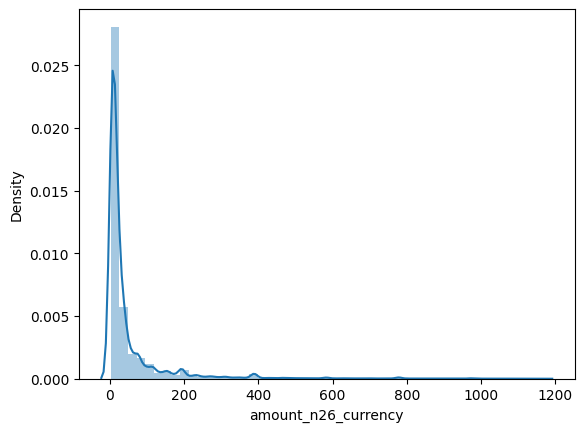

<Figure size 1000x600 with 0 Axes>

In [64]:
sns.distplot(df2['amount_n26_currency'], kde = True)
plt.figure(figsize=(10,6))

### count of explaination

<Figure size 1000x600 with 0 Axes>

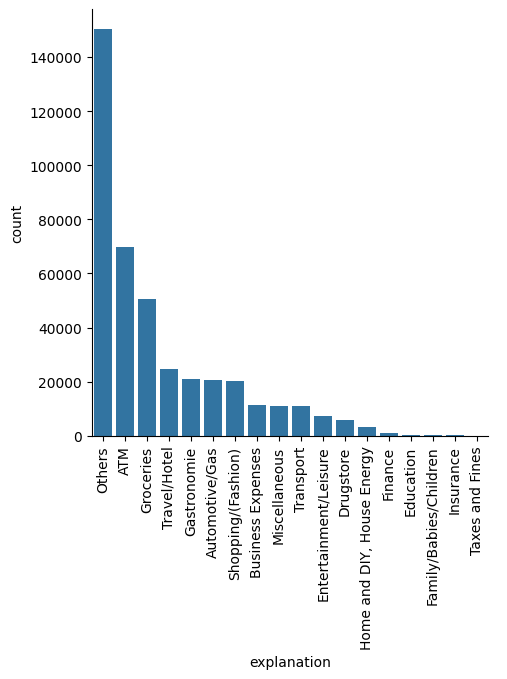

In [10]:
plt.figure(figsize=(10, 6))
plot = sns.catplot(x='explanation', data=df2, order = df2['explanation'].value_counts().index, kind='count')
plot.set_xticklabels(rotation=90)
plt.show()

### count by agent

<Figure size 1000x600 with 0 Axes>

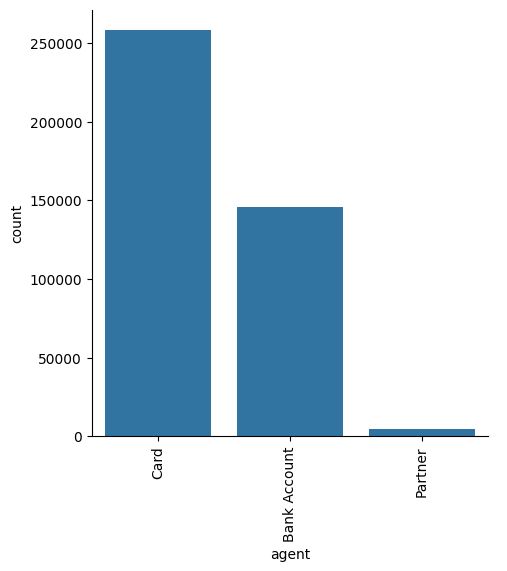

In [11]:
plt.figure(figsize=(10, 6))
plot = sns.catplot(x='agent', data=df2, order = df2['agent'].value_counts().index, kind='count')
plot.set_xticklabels(rotation=90)
plt.show()

### count of direction

<Figure size 1000x600 with 0 Axes>

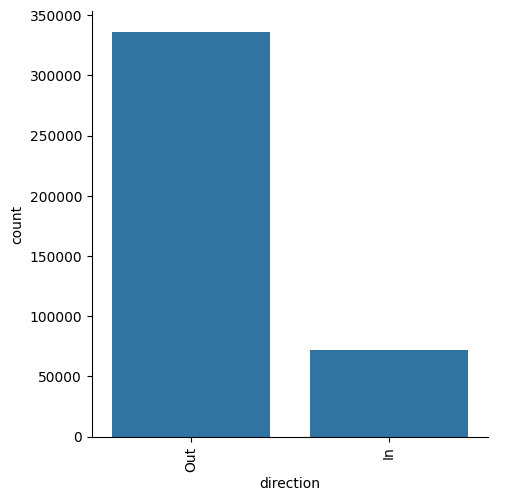

In [12]:
plt.figure(figsize=(10, 6))
plot = sns.catplot(x='direction', data=df2, order = df2['direction'].value_counts().index, kind='count')
plot.set_xticklabels(rotation=90)
plt.show()


In [13]:
df2['transaction_date'] = pd.to_datetime(df2['transaction_date'])


### Total Money Spend Daily by Direction

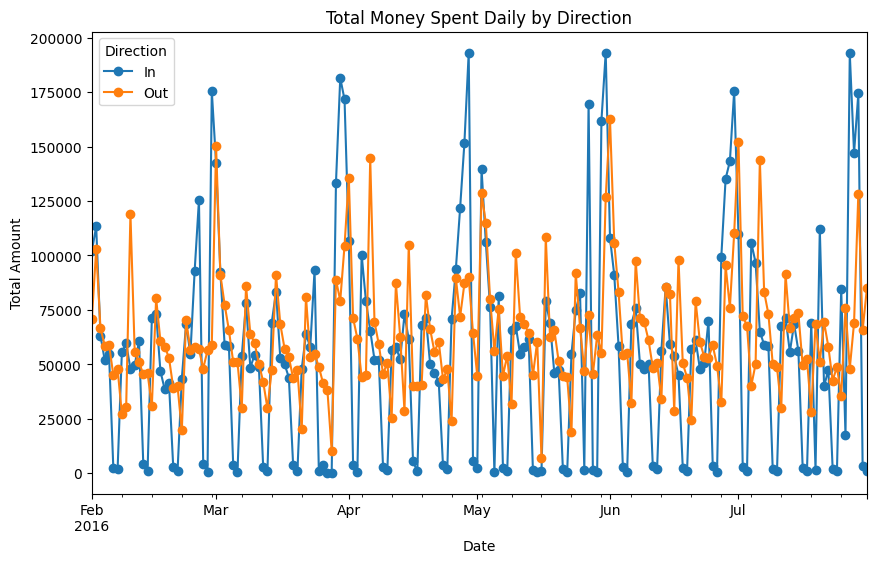

In [14]:
money_spent_daily = df2.groupby(['transaction_date', 'direction'])['amount_n26_currency'].sum().unstack()
money_spent_daily.plot(figsize=(10, 6), marker='o')
plt.title('Total Money Spent Daily by Direction')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend(title='Direction')
plt.show()

### Weekly trend of usage

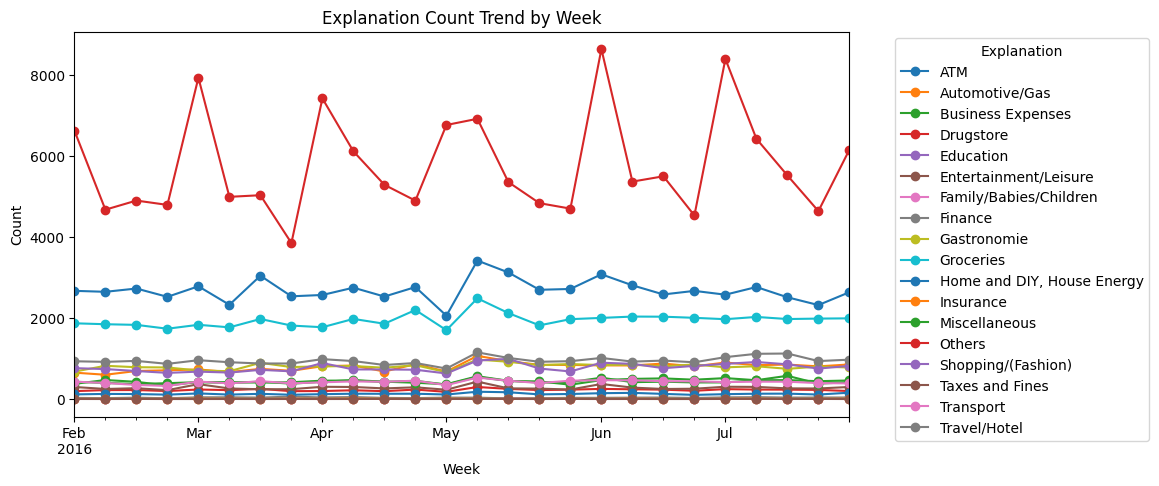

In [15]:
explanation_count_weekly = df2.groupby([pd.Grouper(key='transaction_date', freq='W'), 'explanation']).size().unstack(fill_value=0)
explanation_count_weekly.plot(figsize=(10, 5), marker='o')
plt.title('Explanation Count Trend by Week')
plt.xlabel('Week')
plt.ylabel('Count')
plt.legend(title='Explanation',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Weekly Trend of Money transfer method

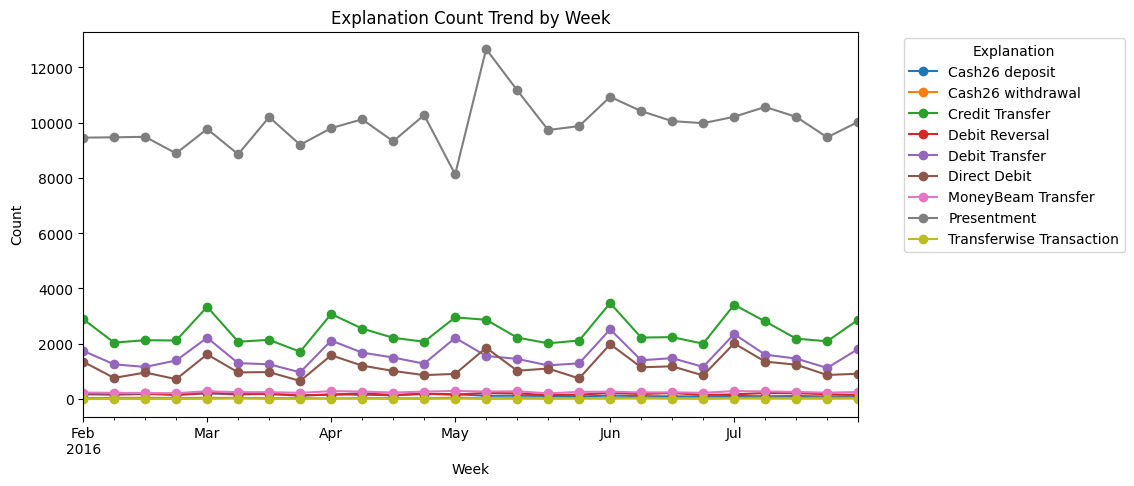

In [16]:
explanation_count_weekly = df2.groupby([pd.Grouper(key='transaction_date', freq='W'), 'trans_desc']).size().unstack(fill_value=0)
explanation_count_weekly.plot(figsize=(10, 5), marker='o')
plt.title('Explanation Count Trend by Week')
plt.xlabel('Week')
plt.ylabel('Count')
plt.legend(title='Explanation',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Total transaction count by Week

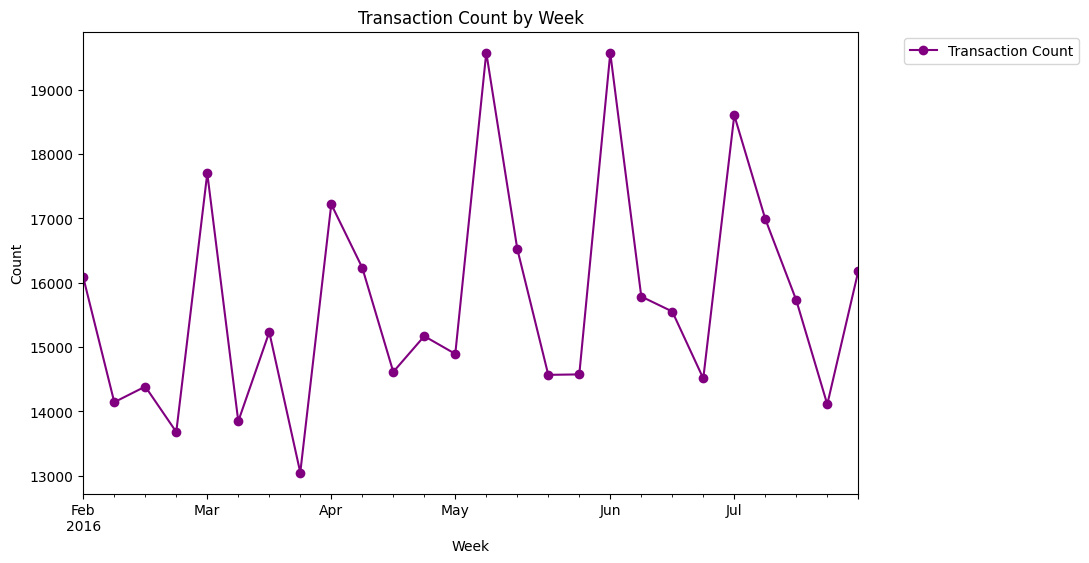

In [17]:
transaction_count_weekly = df2.groupby(pd.Grouper(key='transaction_date', freq='W')).size()
ax = transaction_count_weekly.plot(figsize=(10, 6), marker='o', color='purple')
plt.title('Transaction Count by Week')
plt.xlabel('Week')
plt.ylabel('Count')
plt.legend(['Transaction Count'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## From this, after learning from the visualization, next step is to clean data and the analysis we want to apply is time series which we will not require multiple variable for the analysis. In this case we will focus in splitting data into "Money In" and "Money Out" for different analysis of each data

In [75]:
model_df = df2.drop(['dataset_transaction', 'dataset_user','trans_desc', 'explanation'], axis = 1)
model_df.columns

Index(['user_id', 'transaction_date', 'transaction_type', 'mcc_group',
       'amount_n26_currency', 'direction', 'agent'],
      dtype='object')

In [77]:
one_hot = pd.get_dummies(model_df[['transaction_type', 'mcc_group', 'direction', 'agent']])

one_hot = one_hot.astype(int)

model_df = pd.concat([model_df, one_hot],axis =1)

model_df = model_df.drop(['transaction_type', 'mcc_group', 'direction', 'agent'], axis = 1)

In [78]:
model_df['transaction_date'] = pd.to_datetime(model_df['transaction_date'])

# Split data into Money In and Money Out
money_in = model_df[model_df['direction_In'] == 1]
money_out = model_df[model_df['direction_Out'] == 1]

money_in = money_in.drop(['direction_In','direction_Out'], axis = 1)
money_out = money_out.drop(['direction_In','direction_Out'], axis = 1)

In [79]:
money_in

user_id transaction_date  \
200     77a52d4da43d0106d321cdc1364bfe01       2016-02-01   
206     f70f8ff785fac332a46323ab174082e2       2016-02-01   
207     878fb2c5de84f1508129949e44b9820c       2016-02-01   
208     208da7525d6b020c9c4272025be11ddc       2016-02-01   
209     53a8dec0c1e388dfb13ce4ab5f85d4d5       2016-02-01   
...                                  ...              ...   
408518  e94987206df5e0c0dee2d0d68ff356c4       2016-07-31   
408521  a6308afdc749eb49d5dd1c33d37b30ea       2016-07-31   
408531  746c33f698d71fbd586d6dc4666b6bac       2016-07-31   
408536  6f4bee554490392f17c6d090d4bf7aed       2016-07-31   
408538  1eea852680b1e7da46ff7bc7a5a508c8       2016-07-31   

        amount_n26_currency  transaction_type_BBU  transaction_type_BUB  \
200                      24                     0                     0   
206                      38                     0                     0   
207                      34                     0                     0   
208                      21                     0                     0   
209                      94                     0                     0   
...                     ...                   ...                   ...   
408518                   11                     0                     0   
408521                   48                     0                     0   
408531                  311                     0                     0   
408536                   42                     0                     0   
408538                   19                     0                     0   

        transaction_type_CT  transaction_type_DD  transaction_type_DR  \
200                       1                    0                    0   
206                       1                    0                    0   
207                       1                    0                    0   
208                       0                    0                    1   
209                       0                    0                    1   
...                     ...                  ...                  ...   
408518                    1                    0                    0   
408521                    1                    0                    0   
408531                    1                    0                    0   
408536                    1                    0                    0   
408538                    1                    0                    0   

        transaction_type_DT  transaction_type_FT  transaction_type_PT  \
200                       0                    0                    0   
206                       0                    0                    0   
207                       0                    0                    0   
208                       0                    0                    0   
209                       0                    0                    0   
...                     ...                  ...                  ...   
408518                    0                    0                    0   
408521                    0                    0                    0   
408531                    0                    0                    0   
408536                    0                    0                    0   
408538                    0                    0                    0   

        transaction_type_TUB  agent_Bank Account  agent_Card  agent_Partner  
200                        0                   1           0              0  
206                        0                   1           0              0  
207                        0                   1           0              0  
208                        0                   1           0              0  
209                        0                   1           0              0  
...                      ...                 ...         ...            ...  
408518                     0                   1           0              0  
408521               

In [80]:
money_out

user_id transaction_date  \
0       a78884f5e76951188c1e719d4956773a       2016-02-01   
1       b0333294fef6ff1299102a70ad46b126       2016-02-01   
2       7b8d2a2780adae0cd0c248e92c1b28dc       2016-02-01   
3       cc4abaa500f7db4390ae3f02bd36d805       2016-02-01   
4       49b99d1d5ba028566639e8b3eb7c055b       2016-02-01   
...                                  ...              ...   
408541  bc639c7495889105713fc6b1025264ac       2016-07-31   
408542  0dfb685e3d705957ef9e0c472604b067       2016-07-31   
408543  918eb93c2d3b084614e3570886715f84       2016-07-31   
408544  918eb93c2d3b084614e3570886715f84       2016-07-31   
408545  25afbb78936ce100bbd1e61cecb37403       2016-07-31   

        amount_n26_currency  transaction_type_BBU  transaction_type_BUB  \
0                       350                     0                     0   
1                       202                     0                     0   
2                       291                     0                     0   
3                       214                     0                     0   
4                       272                     0                     0   
...                     ...                   ...                   ...   
408541                    5                     0                     0   
408542                  155                     0                     0   
408543                   19                     0                     0   
408544                   19                     0                     0   
408545                   36                     0                     0   

        transaction_type_CT  transaction_type_DD  transaction_type_DR  \
0                         0                    0                    0   
1                         0                    0                    0   
2                         0                    0                    0   
3                         0                    0                    0   
4                         0                    0                    0   
...                     ...                  ...                  ...   
408541                    0                    0                    0   
408542                    0                    0                    0   
408543                    0                    0                    0   
408544                    0                    0                    0   
408545                    0                    0                    0   

        transaction_type_DT  transaction_type_FT  transaction_type_PT  \
0                         1                    0                    0   
1                         1                    0                    0   
2                         1                    0                    0   
3                         1                    0                    0   
4                         1                    0                    0   
...                     ...                  ...                  ...   
408541                    1                    0                    0   
408542                    1                    0                    0   
408543                    1                    0                    0   
408544                    1                    0                    0   
408545                    1                    0                    0   

        transaction_type_TUB  agent_Bank Account  agent_Card  agent_Partner  
0                          0                   1           0              0  
1                          0                   1           0              0  
2                          0                   1           0              0  
3                          0                   1           0              0  
4                          0                   1           0              0  
...                      ...                 ...         ...            ...  
408541                     0                   1           0              0  
408542               

In [81]:
money_in = money_in.sort_values(['user_id','transaction_date']).reset_index(drop=True)
money_out = money_out.sort_values(['user_id','transaction_date']).reset_index(drop=True)


### To create train and test, with date ends on July 31st, we will use a whole July as testing and the rest will be for training

In [118]:
money_in_train = money_in[money_in['transaction_date'].dt.month < 7].reset_index(drop=True)
money_in_test = money_in[money_in['transaction_date'].dt.month >= 7].reset_index(drop=True)

money_out_train = money_out[money_out['transaction_date'].dt.month < 7].reset_index(drop=True)
money_out_test = money_out[money_out['transaction_date'].dt.month >= 7].reset_index(drop=True)

## For creating time series analysis, we have to encode time and also create lag feature

In [119]:
def encode_time(df):
    df['transaction_date'] = pd.to_datetime(df['transaction_date'])
    df['year'] = df['transaction_date'].dt.year
    df['month'] = df['transaction_date'].dt.month
    df['day'] = df['transaction_date'].dt.day
    df['weekday'] = df['transaction_date'].dt.weekday
    return df

money_in_train = encode_time(money_in_train)
money_in_test = encode_time(money_in_test)
money_out_train = encode_time(money_out_train)
money_out_test = encode_time(money_out_test)


In [120]:
def create_lag_features_grouped_by_user(df, lag_features, lag_periods):
    for feature in lag_features:
        for period in lag_periods:
            df[f"{feature}_lag_{period}"] = df.groupby('user_id')[feature].shift(periods=period)
            df[f"{feature}_lag_{period}"].fillna(0, inplace=True)
    return df

money_in_train = create_lag_features_grouped_by_user(money_in_train, lag_features, lag_periods)
money_in_test = create_lag_features_grouped_by_user(money_in_test, lag_features, lag_periods)
money_out_train = create_lag_features_grouped_by_user(money_out_train, lag_features, lag_periods)
money_out_test = create_lag_features_grouped_by_user(money_out_test, lag_features, lag_periods)



<ipython-input-120-2da3875eabb5>:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-120-2da3875eabb5>:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

In [121]:
money_in_train

user_id transaction_date  amount_n26_currency  \
0      000295594379774ab9ac2c78c946d615       2016-02-19                  291   
1      000295594379774ab9ac2c78c946d615       2016-03-09                  381   
2      000295594379774ab9ac2c78c946d615       2016-05-10                  155   
3      000295594379774ab9ac2c78c946d615       2016-06-03                  115   
4      000aa792d73dd82b16a29692772d395a       2016-05-09                   77   
...                                 ...              ...                  ...   
60092  fffde1ba10b4040deb651162f56c9fc4       2016-05-03                  389   
60093  fffde1ba10b4040deb651162f56c9fc4       2016-05-10                   58   
60094  fffde1ba10b4040deb651162f56c9fc4       2016-05-29                    6   
60095  fffde1ba10b4040deb651162f56c9fc4       2016-06-02                  194   
60096  fffde1ba10b4040deb651162f56c9fc4       2016-06-17                   45   

       transaction_type_BBU  transaction_type_BUB  transaction_type_CT  \
0                         0                     0                    1   
1                         0                     0                    1   
2                         0                     0                    1   
3                         1                     0                    0   
4                         0                     0                    1   
...                     ...                   ...                  ...   
60092                     0                     0                    1   
60093                     0                     0                    1   
60094                     0                     0                    1   
60095                     0                     0                    1   
60096                     0                     0                    1   

       transaction_type_DD  transaction_type_DR  transaction_type_DT  \
0                        0                    0                    0   
1                        0                    0                    0   
2                        0                    0                    0   
3                        0                    0                    0   
4                        0                    0                    0   
...                    ...                  ...                  ...   
60092                    0                    0                    0   
60093                    0                    0                    0   
60094                    0                    0                    0   
60095                    0                    0                    0   
60096                    0                    0                    0   

       transaction_type_FT  ...  agent_Bank Account  agent_Card  \
0                        0  ...                   1           0   
1                        0  ...                   1           0   
2                        0  ...                   1           0   
3                        0  ...                   0           0   
4                        0  ...                   1           0   
...                    ...  ...                 ...         ...   
60092                    0  ...                   1           0   
60093                    0  ...                   1           0   
60094                    0  ...                   1           0   
60095                    0  ...                   1           0   
60096                    0  ...                   1           0   

       agent_Partner  year  month  day  weekday  amount_n26_currency_lag_1  \
0                  0  2016      2   19        4                        0.0   
1                  0  2016      3    9        2                      291.0   
2                  0  2016      5   10        1                      381.0   
3                  1  2016      6    3        4                      155.0   
4                  0  2016      5    9        0                        0.0   
...              ...   ...    ..

In [122]:
money_in_train

user_id transaction_date  amount_n26_currency  \
0      000295594379774ab9ac2c78c946d615       2016-02-19                  291   
1      000295594379774ab9ac2c78c946d615       2016-03-09                  381   
2      000295594379774ab9ac2c78c946d615       2016-05-10                  155   
3      000295594379774ab9ac2c78c946d615       2016-06-03                  115   
4      000aa792d73dd82b16a29692772d395a       2016-05-09                   77   
...                                 ...              ...                  ...   
60092  fffde1ba10b4040deb651162f56c9fc4       2016-05-03                  389   
60093  fffde1ba10b4040deb651162f56c9fc4       2016-05-10                   58   
60094  fffde1ba10b4040deb651162f56c9fc4       2016-05-29                    6   
60095  fffde1ba10b4040deb651162f56c9fc4       2016-06-02                  194   
60096  fffde1ba10b4040deb651162f56c9fc4       2016-06-17                   45   

       transaction_type_BBU  transaction_type_BUB  transaction_type_CT  \
0                         0                     0                    1   
1                         0                     0                    1   
2                         0                     0                    1   
3                         1                     0                    0   
4                         0                     0                    1   
...                     ...                   ...                  ...   
60092                     0                     0                    1   
60093                     0                     0                    1   
60094                     0                     0                    1   
60095                     0                     0                    1   
60096                     0                     0                    1   

       transaction_type_DD  transaction_type_DR  transaction_type_DT  \
0                        0                    0                    0   
1                        0                    0                    0   
2                        0                    0                    0   
3                        0                    0                    0   
4                        0                    0                    0   
...                    ...                  ...                  ...   
60092                    0                    0                    0   
60093                    0                    0                    0   
60094                    0                    0                    0   
60095                    0                    0                    0   
60096                    0                    0                    0   

       transaction_type_FT  ...  agent_Bank Account  agent_Card  \
0                        0  ...                   1           0   
1                        0  ...                   1           0   
2                        0  ...                   1           0   
3                        0  ...                   0           0   
4                        0  ...                   1           0   
...                    ...  ...                 ...         ...   
60092                    0  ...                   1           0   
60093                    0  ...                   1           0   
60094                    0  ...                   1           0   
60095                    0  ...                   1           0   
60096                    0  ...                   1           0   

       agent_Partner  year  month  day  weekday  amount_n26_currency_lag_1  \
0                  0  2016      2   19        4                        0.0   
1                  0  2016      3    9        2                      291.0   
2                  0  2016      5   10        1                      381.0   
3                  1  2016      6    3        4                      155.0   
4                  0  2016      5    9        0                        0.0   
...              ...   ...    ..

## Train and test data with XGBRegressor, and for target we will normalize the target value to achieve the central limit theorem

In [197]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  mean_squared_error
from sklearn.model_selection import cross_val_score


In [198]:
X_train = money_in_train.drop(['user_id','transaction_date'], axis = 1)
X_test = money_in_test.drop(['user_id','transaction_date'], axis = 1)
y_train = np.log((money_in_train['amount_n26_currency']))
y_test = np.log((money_in_test['amount_n26_currency']))

scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)


In [199]:
model = LGBMRegressor()
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005845 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1075
[LightGBM] [Info] Number of data points in the train set: 60097, number of used features: 12
[LightGBM] [Info] Start training from score 4.042278


LGBMRegressor()

In [200]:
y_pred = model.predict(X_test)

In [201]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.0025482740372680984

In [202]:
neg_rmse_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')

rmse_scores = -neg_rmse_scores

avg_rmse = np.mean(rmse_scores)

print("RMSE Scores:", rmse_scores)
print(f"Average RMSE: {avg_rmse}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1075
[LightGBM] [Info] Number of data points in the train set: 54087, number of used features: 12
[LightGBM] [Info] Start training from score 4.045717
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1075
[LightGBM] [Info] Number of data points in the train set: 54087, number of used features: 12
[LightGBM] [Info] Start training from score 4.046771
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [

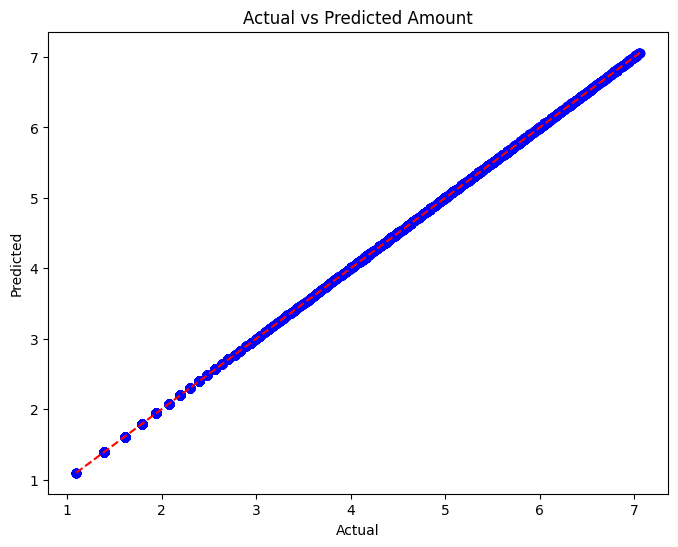

In [203]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Amount')
plt.show()

In [215]:
import plotly.graph_objs as go
import plotly.express as px

comparison_df = pd.DataFrame({
    'date': money_in_test['transaction_date'],
    'actual': np.power(np.e, y_test.ravel()),
    'predicted': np.power(np.e, y_pred)})

comparison_df['date'] = pd.to_datetime(comparison_df['date'])

comparison_df = comparison_df.sort_values('date')

trace_actual = go.Scatter(x=comparison_df['date'], y=comparison_df['actual'],
                          mode='lines', name='Actual')
trace_predicted = go.Scatter(x=comparison_df['date'], y=comparison_df['predicted'],
                             mode='lines', line={'dash': 'dash'}, name='Predicted')

fig = go.Figure([trace_actual, trace_predicted])

fig.update_layout(hovermode='x')

fig.show()


<ipython-input-215-98961fa20539>:6: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



## With the results, we can see that there are still error due to some outlier of the money in data.

In [205]:
X_train2 = money_out_train.drop(['user_id','transaction_date'], axis = 1)
X_test2 = money_out_test.drop(['user_id','transaction_date'], axis = 1)
y_train2 = np.log((money_out_train['amount_n26_currency']))
y_test2 = np.log((money_out_test['amount_n26_currency']))

scale = StandardScaler()
X_train2_scaled = scale.fit_transform(X_train2)
X_test2_scaled = scale.transform(X_test2)


In [206]:
model = LGBMRegressor()
model.fit(X_train2, y_train2)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1083
[LightGBM] [Info] Number of data points in the train set: 277463, number of used features: 16
[LightGBM] [Info] Start training from score 2.775233


LGBMRegressor()

In [207]:
y_pred2 = model.predict(X_test2)

In [208]:
np.sqrt(mean_squared_error(y_test2, y_pred2))

0.0009664725914075123

In [209]:
neg_rmse_scores = cross_val_score(model, X_train2, y_train2, cv=10, scoring='neg_root_mean_squared_error')

rmse_scores = -neg_rmse_scores

avg_rmse = np.mean(rmse_scores)

print("RMSE Scores:", rmse_scores)
print(f"Average RMSE: {avg_rmse}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1083
[LightGBM] [Info] Number of data points in the train set: 249716, number of used features: 16
[LightGBM] [Info] Start training from score 2.779235
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1083
[LightGBM] [Info] Number of data points in the train set: 249716, number of used features: 16
[LightGBM] [Info] Start training from score 2.773396
[LightGBM] [Warning] Found

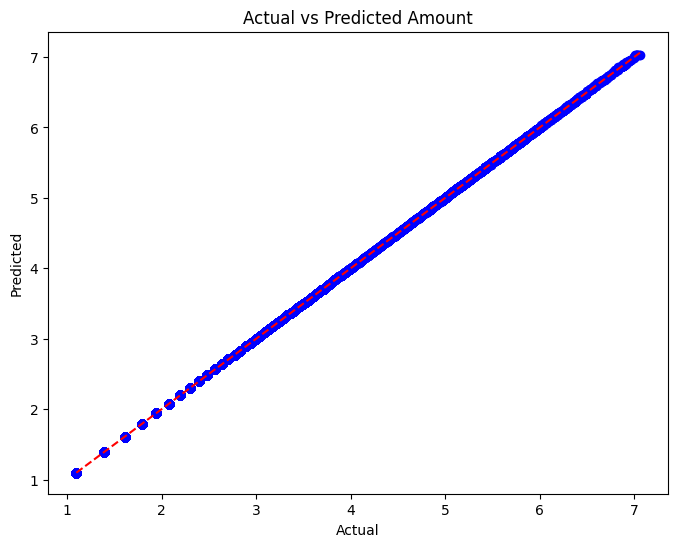

In [210]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test2, y_pred2, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Amount')
plt.show()

In [214]:
comparison_df = pd.DataFrame({
    'date': money_out_test['transaction_date'],
    'actual': np.power(np.e, y_test2.ravel()),
    'predicted': np.power(np.e, y_pred2)})

comparison_df['date'] = pd.to_datetime(comparison_df['date'])

comparison_df = comparison_df.sort_values('date')

trace_actual = go.Scatter(x=comparison_df['date'], y=comparison_df['actual'],
                          mode='lines', name='Actual')
trace_predicted = go.Scatter(x=comparison_df['date'], y=comparison_df['predicted'],
                             mode='lines', line={'dash': 'dash'}, name='Predicted')

fig = go.Figure([trace_actual, trace_predicted])

fig.update_layout(hovermode='x')

fig.show()


<ipython-input-214-ccdf1ebf1563>:3: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



# **Model is finally in great fit after scaling and adding more feature**